In [1]:
import numpy as np, matplotlib.pyplot as plt, itertools, networkx as nx
from sympy import symbols, solve, Eq

# Exercise 1

Closed System: 
- Uninfluenced by forces outside of the system itself
- Conservation of all energy and matter within the system
- Contains laws that govern the transition from one state to another state (in time)

Existence:
- Perhaps the only truly closed system is the whole of the universe, as forces, while diminishing, still exist even at great distances

Assumptions:
- Not all things impact the transition of states in a system. ie: can be represented by fewer nodes or actors than actually exist.

Open System:
- Allows for outside influence
- Internal dynamics are influenced by exogenous factors


# Exercise 2
General way to classify the laws that are possible for a 6-state system

1. By how many cycles there are
2. By how many possibilites there are within each cycle

Here is an algorithmic solution using depth-first graph search algorithm:

### First let's just visualize the graph using networkx and matplotlib

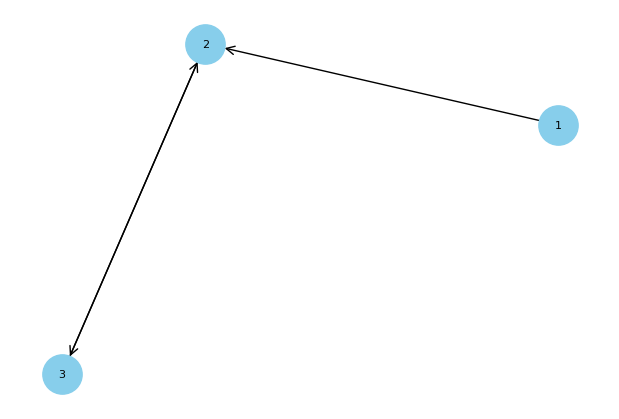

In [2]:
# Figure 9: A system that is irreversible
graph = { 1: [2], 2: [3], 3: [2]}
         
def plot_graph(graph):
    G = nx.DiGraph(graph)
    plt.figure(figsize=(6, 4))
    nx.draw(G, with_labels=True, node_color='skyblue', node_size=800, 
            arrowstyle='->', arrowsize=15, font_size=8)
    plt.show()

plot_graph(graph)

### Next we need to determine the reversibility of a graph
The simple law of reversibility: if each state has a single unique arrow leading to it and a single arrow away from it, it is reversible

In [3]:
def is_reversible(graph):
    states = set()
    for state, other_state in itertools.permutations(graph.keys(), 2):
        if len(graph[state]) != 1:
            return False
        if state in graph[other_state]:
            if state in states:
                return False
            states.add(state)
    return True

Reversible: True


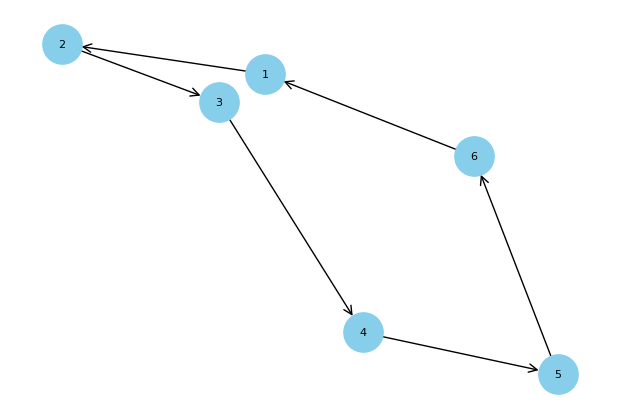

In [4]:
# Figure 6: Dynamical Law 2
reversible_graph = {1:[2], 2:[3], 3: [4], 4:[5], 5:[6], 6:[1]}

print(f'Reversible: {is_reversible(reversible_graph)}')
plot_graph(reversible_graph)

Reversible: False


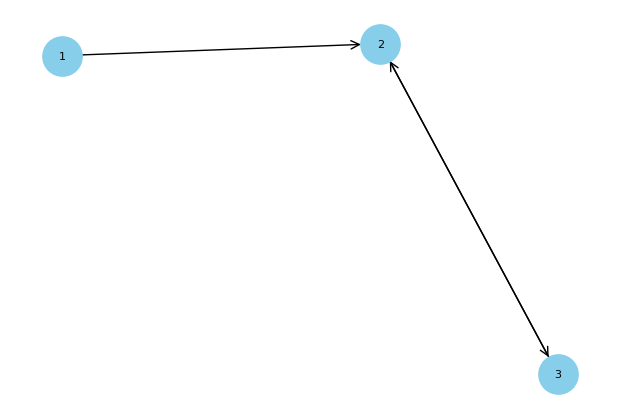

In [5]:
# Our original graph was irreverisble

print(f'Reversible: {is_reversible(graph)}')
plot_graph(graph)

### Now let's use a depth-first-traversal to determine the cycles

In [6]:
def dfs(graph, start):
    stack = [(start, [])]
    while stack:
        state, path = stack.pop()

        # a cycle is found if the dfs algorithm finds a path to the initial state
        if path and state == start:
            yield path
            continue

        for posterior in graph[state]:
            if posterior in path:
                continue
            stack.append((posterior, path + [posterior]))

# Searching from each state as the initial state
def find_cycles(graph):
    cycles = []
    for state in graph.keys():
        cycles.extend(cycle for cycle in dfs(graph, state))
    return cycles


print(find_cycles(graph))
print(find_cycles(reversible_graph))

[[3, 2], [2, 3]]
[[2, 3, 4, 5, 6, 1], [3, 4, 5, 6, 1, 2], [4, 5, 6, 1, 2, 3], [5, 6, 1, 2, 3, 4], [6, 1, 2, 3, 4, 5], [1, 2, 3, 4, 5, 6]]


### We should check for the condition of multiple, independent cycles

Reversible: True
[[2, 6, 1], [6, 1, 2], [1, 2, 6], [3, 4, 5], [4, 5, 3], [5, 3, 4]]


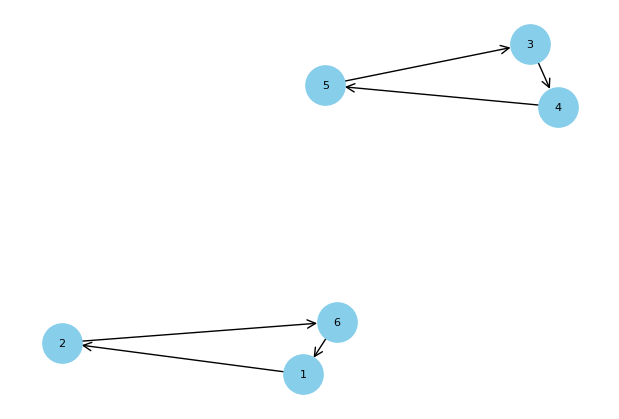

In [7]:
# Figure 7: Dynamical Law 3

ind_graph = {1:[2], 2:[6], 6:[1], 5:[3], 3:[4], 4:[5]}

print(f'Reversible: {is_reversible(ind_graph)}')
print(find_cycles(ind_graph))
plot_graph(ind_graph)

# Exercise 3: Determine the allowable dynamical laws

$ N(n+1) = N(n) - 1$: allowable

$N(n+1) = N(n) + 2$: allowable

$N(n+1) = N(n)^{2}$: not allowable

$N(n+1) = -1^{N(n)}N(n)$: allowable


In short, the reason the third law is not allowable is because we cannot find a unique inverse function. The following searches for an inverse function using Sympy

In [8]:
def find_inverse(func):
    x, y = symbols('x y')
    equation = Eq(y, func(x))
    try:
        inverse_sol = solve(equation, x)
        if len(inverse_sol) == 1:
            return inverse_sol[0]
        elif len(inverse_sol) > 1:
            return 'Function is not reversible'
        else:
            return 'No unique inverse found.'
    except Exception as e:
        return f'Inverse not found due to: {e}'
    
def law1(n): return n - 1
def law2(n): return n + 2
def law3(n): return n ** 2
def law4(n): return (-1)**n * n

print(find_inverse(law1))
print(find_inverse(law2))
print(find_inverse(law3))
print(find_inverse(law4))

y + 1
y - 2
Function is not reversible
-I*LambertW(I*pi*y)/pi


## And we can graph these dynamical laws

In [9]:
# Modifying the plot function to plot in a straight line
def plot_graph_linear(graph):
    G = nx.DiGraph(graph)
    pos = {node: (i, 0) for i, node in enumerate(G.nodes())}
    plt.figure(figsize=(6, 4))
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=800, 
            arrowstyle='->', arrowsize=15, font_size=8)
    plt.show()

def evaluate_dynamics(f, start, end, length = 10):
    state_space = {}
    N = start
    n = 0
    if start < end: 
        while N <= end and n < length:
            n += 1
            N1 = N
            N = f(N)
            state_space[N1] = [N]
    else: 
        while N >= end and n < length:
            n += 1
            N1 = N
            N = f(N)
            state_space[N1] = [N]
    return state_space

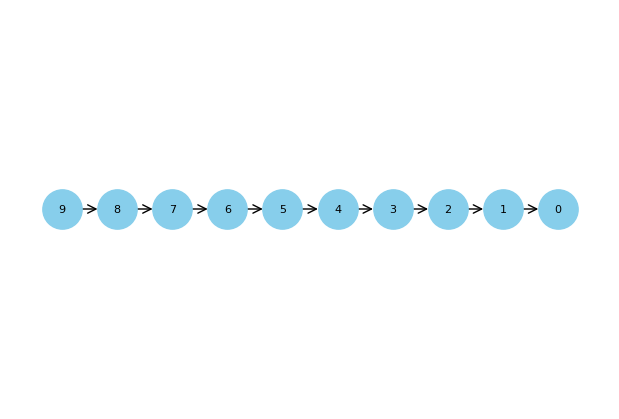

In [10]:
# Dynamical Law 1

plot_graph_linear(evaluate_dynamics(law1, 9, 1))

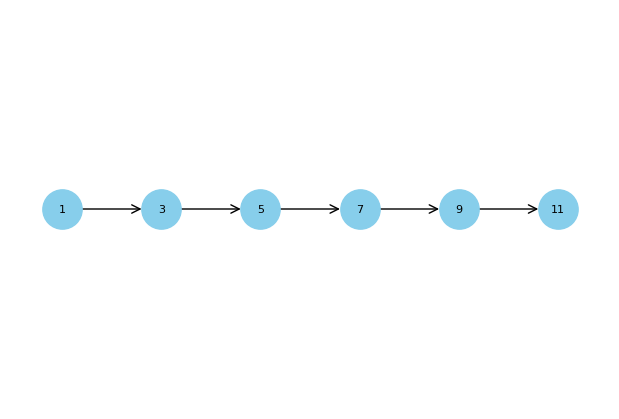

In [11]:
# Dynamical law 2

plot_graph_linear(evaluate_dynamics(law2, 1, 9))

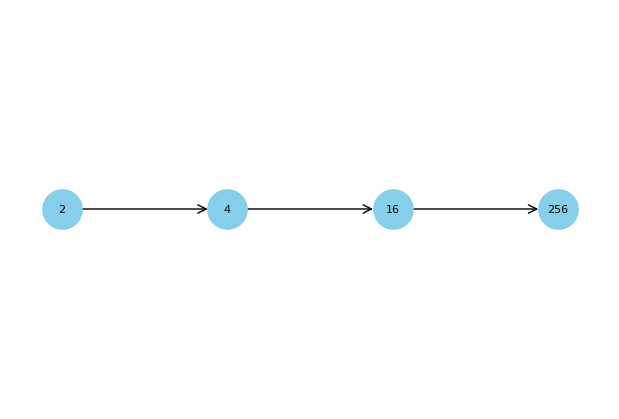

In [12]:
# Dynamical law 3

plot_graph_linear(evaluate_dynamics(law3, 2, 16))

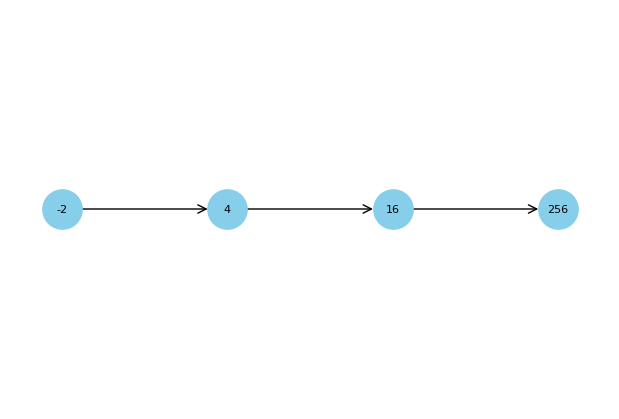

In [13]:
# Here we can show that dynamical law three is not allowable, as we can achieve the same outcome with different initial conditions

plot_graph_linear(evaluate_dynamics(law3, -2, 16))

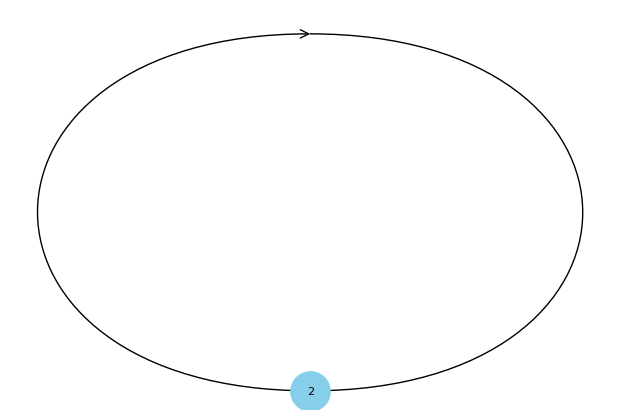

In [14]:
# Dynamical law 4

plot_graph_linear(evaluate_dynamics(law4, 2, 16, length = 5))